# Used Car Price Prediction 

https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [3]:
pip install ipython-autotime
#to track down time of each cell using %%time

You should consider upgrading via the 'D:\Installed Softwares\Python 3.10.2\python.exe -m pip install --upgrade pip' command.


### Importing Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import *
from sklearn.preprocessing import *
import numpy as np
from collections import Counter
from sklearn.linear_model import *
from scipy.sparse import hstack
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import *
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
import xgboost as xgb
import lightgbm as lgb
# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Setting Up the Data path

In [0]:
%%time
dataPath = '/content/drive/My Drive/Colab Notebooks/Used Cars/vehicles.csv'

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


#### Creating a DataFrame

In [0]:
%%time
data = pd.read_csv(dataPath)

CPU times: user 15.4 s, sys: 4.42 s, total: 19.9 s
Wall time: 21.7 s


#### Dimensions

In [0]:
%%time
print(data.shape)
total_rows = data.shape[0]

(539759, 25)
CPU times: user 99 µs, sys: 29 µs, total: 128 µs
Wall time: 106 µs


#### Viewing the Columns

In [0]:
%%time
data.columns

CPU times: user 51 µs, sys: 15 µs, total: 66 µs
Wall time: 69.6 µs


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

#### Glimpse of the Data

In [0]:
%%time
data.head()

CPU times: user 704 µs, sys: 0 ns, total: 704 µs
Wall time: 682 µs


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,19UUA8F22CA003926,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,clean,automatic,NaN,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,gas,212526.0,clean,automatic,5J6YH18314L006498,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,NaN,clean,automatic,1GC1KWE85GF266427,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


#### Searching for Duplicayte IDs

In [0]:
%%time
print("Duplicate ID : ",data.id.duplicated().sum())

Duplicate ID :  0
CPU times: user 16.3 ms, sys: 1.07 ms, total: 17.4 ms
Wall time: 16.9 ms


#### Sumary of the Data

In [0]:
%%time
data.describe()

CPU times: user 147 ms, sys: 3.68 ms, total: 151 ms
Wall time: 150 ms


,id,price,year,odometer,county,lat,long
count,5.397590e+05,5.397590e+05,538772.000000,4.407830e+05,0.0,530785.000000,530785.000000
mean,7.087609e+09,1.954214e+05,2009.830982,1.008008e+05,NaN,38.432128,-94.040501
std,5.234176e+06,2.208252e+07,9.161334,1.767058e+05,NaN,5.916936,17.626658
min,7.065765e+09,0.000000e+00,0.000000,0.000000e+00,NaN,-84.911400,-176.810000
25%,7.084240e+09,4.400000e+03,2007.000000,4.703850e+04,NaN,34.197100,-106.782000
50%,7.088973e+09,9.500000e+03,2012.000000,9.330000e+04,NaN,39.077600,-88.100900
75%,7.092094e+09,1.792600e+04,2015.000000,1.377550e+05,NaN,42.449100,-81.219000
max,7.093537e+09,4.294967e+09,2021.000000,6.480922e+07,NaN,84.514800,161.016000


#### Dropping 0 Prices Data :
As we can see that there are cars with 0 price we are dropping them to make a better analysis of data.

In [0]:
%%time
data.drop(data[data['price']<=0].index, inplace = True) 

CPU times: user 162 ms, sys: 48 ms, total: 210 ms
Wall time: 210 ms


#### Checking Price variations w.r.t Manufacturers

In [0]:
%%time
# using median as mean results in outlier
median_prices_brand = data.groupby(['manufacturer'])['price'].median() 

CPU times: user 54.7 ms, sys: 68 µs, total: 54.8 ms
Wall time: 54.4 ms


#### Plotting Price v/s Manufacturers

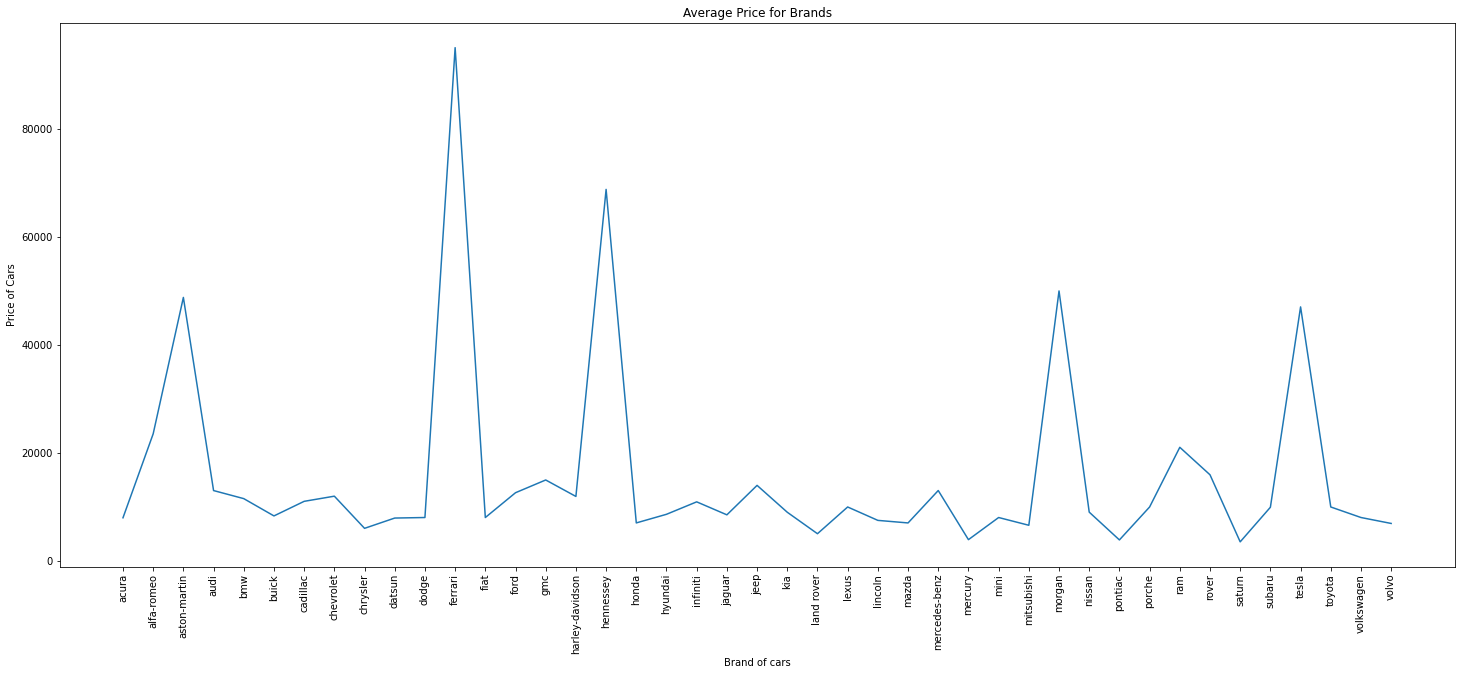

CPU times: user 416 ms, sys: 18.6 ms, total: 434 ms
Wall time: 433 ms


In [0]:
%%time
_,ax=plt.subplots(1,1,figsize=(25,10))
ax.ticklabel_format(useOffset=False,style='plain')
ax.plot(median_prices_brand)
plt.xticks(rotation='vertical')
plt.title("Average Price for Brands")
plt.xlabel('Brand of cars')
plt.ylabel('Price of Cars')
plt.show()

#### Checking Price variations w.r.t Fuel Type

In [0]:
# Chekcing unique fuel types, 
%%time
data.fuel.unique()

CPU times: user 29.4 ms, sys: 0 ns, total: 29.4 ms
Wall time: 29.8 ms


array(['gas', 'diesel', nan, 'other', 'hybrid', 'electric'], dtype=object)

In [0]:
# chcking no of rows having null values
%%time
data.fuel.isnull().sum()

CPU times: user 25.7 ms, sys: 0 ns, total: 25.7 ms
Wall time: 25.4 ms


3116

In [0]:
# dropping the null values
%%time
data.fuel.dropna(inplace=True)

CPU times: user 25.7 ms, sys: 1.15 ms, total: 26.9 ms
Wall time: 26.3 ms


In [0]:
# checking for remaining unique values
%%time
data.fuel.unique()

CPU times: user 18 ms, sys: 0 ns, total: 18 ms
Wall time: 17.6 ms


array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [0]:
# Grouping the data and using median to not be affected by Outliers
%%time
# using median as mean results in outlier
median_prices_fuel = data.groupby(['fuel'])['price'].median() 

CPU times: user 92.2 ms, sys: 0 ns, total: 92.2 ms
Wall time: 91.7 ms


#### Plotting Price v/s Fuel Type

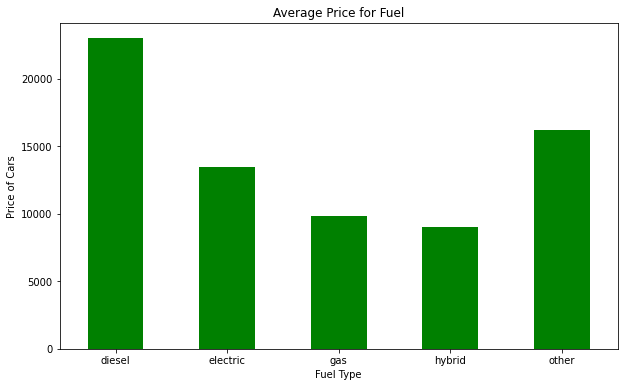

CPU times: user 148 ms, sys: 3.05 ms, total: 151 ms
Wall time: 150 ms


In [0]:
%%time
median_prices_fuel.plot.bar(figsize=(10,6),color='green')
plt.xticks(rotation='horizontal')
plt.title("Average Price for Fuel")
plt.xlabel('Fuel Type')
plt.ylabel('Price of Cars')
plt.show()

#### Checking Price variations w.r.t Transmission Type

In [0]:
# checking unique values of transmission
%%time
data.transmission.unique()

CPU times: user 29.8 ms, sys: 0 ns, total: 29.8 ms
Wall time: 29.7 ms


array(['automatic', nan, 'manual', 'other'], dtype=object)

In [0]:
# checking number of rows having null values 
%%time
data.transmission.isnull().sum()

CPU times: user 22.4 ms, sys: 845 µs, total: 23.2 ms
Wall time: 23 ms


3376

In [0]:
# dropping rows with null vlues
%%time
data.transmission.dropna(inplace=True)

CPU times: user 28.3 ms, sys: 0 ns, total: 28.3 ms
Wall time: 27.8 ms


In [0]:
%%time
data.transmission.unique()

CPU times: user 21.8 ms, sys: 0 ns, total: 21.8 ms
Wall time: 21.5 ms


array(['automatic', 'manual', 'other'], dtype=object)

In [0]:
# Grouping data by Tranmission and calculating median price of each type of transmission
%%time
# using median as mean results in outlier
median_prices_transmission = data.groupby(['transmission'])['price'].median() 

CPU times: user 87.2 ms, sys: 41 µs, total: 87.2 ms
Wall time: 86.8 ms


#### Plotting Price v/s Transmission Type

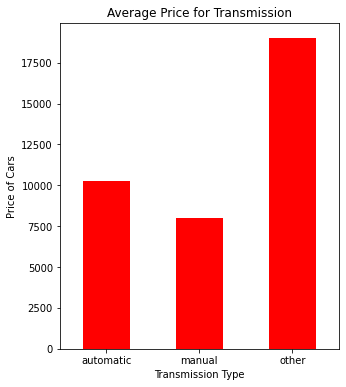

CPU times: user 204 ms, sys: 10.4 ms, total: 214 ms
Wall time: 210 ms


In [0]:
%%time
median_prices_transmission.plot.bar(figsize=(5,6),color='red')
plt.xticks(rotation='horizontal')
plt.title("Average Price for Transmission")
plt.xlabel('Transmission Type')
plt.ylabel('Price of Cars')
plt.show()

### Data Cleaning Operations on Price : Removing Outliers

In [0]:
%%time
data.price.describe()

CPU times: user 17.8 ms, sys: 180 µs, total: 18 ms
Wall time: 20.3 ms


count    4.950700e+05
mean     2.130617e+05
std      2.305759e+07
min      1.000000e+00
25%      5.499000e+03
50%      1.080000e+04
75%      1.890000e+04
max      4.294967e+09
Name: price, dtype: float64

In [0]:
## checking the max and min of the price after removal of 0 previously
%%time
print(data.price.min())
print(data.price.max())

1
4294967295
CPU times: user 2.3 ms, sys: 77 µs, total: 2.38 ms
Wall time: 1.73 ms


In [0]:
## the top 20 most prices used through out
%%time
print ("Top 20 most used price points:")
print (data.price.value_counts().iloc[:20])

Top 20 most used price points:
6995     5193
7995     4966
5995     4951
3500     4879
4995     4847
4500     4695
8995     4659
9995     4421
5500     4232
2500     4145
6500     4001
3995     3883
7500     3332
3000     3177
10995    3161
12995    3095
5000     3089
1        2942
11995    2938
13995    2914
Name: price, dtype: int64
CPU times: user 10.1 ms, sys: 793 µs, total: 10.9 ms
Wall time: 10.5 ms


Now According to many data available on google, we can say that the price of a used car can be max 150000 Dollars depending on cars like Ferarri, Lamborghini, but i would still keep it till 200000 Dollars. And lowest being 100 Dollars.

In [0]:
%%time
data.drop(data[(data.price > 200000) | (data.price < 100)].index,inplace=True)

CPU times: user 190 ms, sys: 13.6 ms, total: 204 ms
Wall time: 204 ms


In [0]:
%%time
data.shape

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 23.1 µs


(490823, 25)

In [0]:
%%time
data.price.describe()

CPU times: user 20.5 ms, sys: 98 µs, total: 20.6 ms
Wall time: 20.4 ms


count    490823.000000
mean      13805.551912
std       11533.393691
min         100.000000
25%        5500.000000
50%       10900.000000
75%       18950.000000
max      200000.000000
Name: price, dtype: float64

#### Plotting the price ranges with Box Plot

CPU times: user 45 ms, sys: 2.21 ms, total: 47.3 ms
Wall time: 45.2 ms


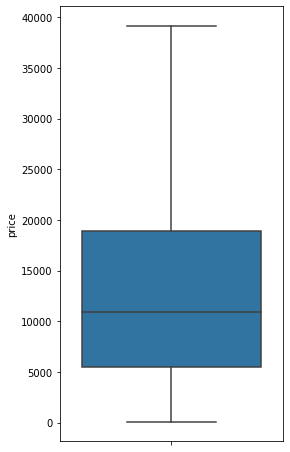

In [0]:
%%time
plt.figure(figsize=(4,8))
sns.boxplot(y='price', data=data,showfliers=False);

#### Checking Price variations w.r.t State

In [0]:
# checking unique state values
%%time
data.state.unique()

CPU times: user 19.2 ms, sys: 59 µs, total: 19.3 ms
Wall time: 19.1 ms


array(['nc', 'ne', 'co', 'ny', 'nj', 'va', 'tn', 'il', 'ia', 'mn', 'fl',
       'ma', 'tx', 'ca', 'or', 'ar', 'wa', 'ct', 'mi', 'sc', 'ks', 'nd',
       'wi', 'mt', 'pa', 'oh', 'wv', 'ms', 'nm', 'sd', 'ky', 'mo', 'la',
       'dc', 'al', 'nv', 'ri', 'ut', 'wy', 'vt', 'me', 'az', 'de', 'ak',
       'ok', 'ga', 'in', 'id', 'md', 'nh', 'hi'], dtype=object)

In [0]:
## grouping values using state and calculaing the median of each state
%%time
# using median as mean results in outlier
median_prices_state = data.groupby(['state'])['price'].median() 

CPU times: user 37.9 ms, sys: 669 µs, total: 38.6 ms
Wall time: 38.6 ms


#### Plotting Price v/s State

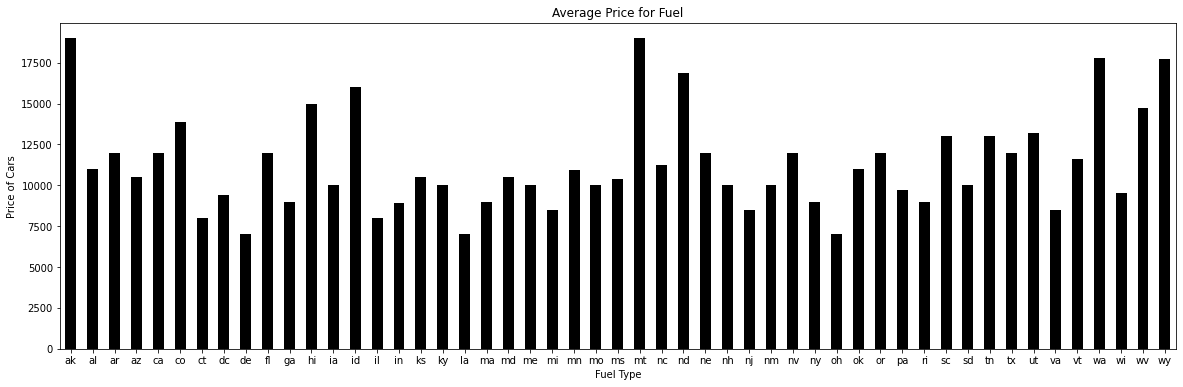

CPU times: user 543 ms, sys: 19.1 ms, total: 562 ms
Wall time: 559 ms


In [0]:
%%time
median_prices_state.plot.bar(figsize=(20,6),color='black')
plt.xticks(rotation='horizontal')
plt.title("Average Price for Fuel")
plt.xlabel('State')
plt.ylabel('Price of Cars')
plt.show()

#### Getting the top 20 states where most cars have been sold

In [0]:
%%time
print ('Top 20 state where cars are sold most:')
print (data['state'].value_counts().iloc[:20])

Top 20 state where cars are sold most:
ca    49491
fl    35682
tx    27414
mi    22312
ny    21243
oh    18656
pa    17515
or    16572
nc    16439
tn    14677
wa    14647
wi    14623
co    11943
va    11688
il    11143
ia    10558
mt    10030
mn    10018
ma     9905
nj     9542
Name: state, dtype: int64
CPU times: user 56.7 ms, sys: 825 µs, total: 57.6 ms
Wall time: 59.7 ms


#### Plotting States v/s Count of Sales

CPU times: user 255 ms, sys: 1.67 ms, total: 256 ms
Wall time: 256 ms


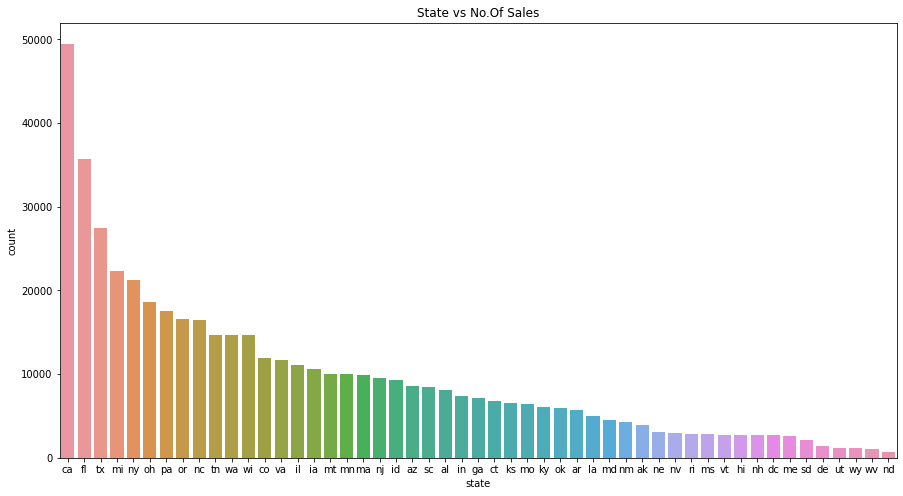

In [0]:
%%time
plt.figure(figsize=(15,8))
ax = sns.countplot(x='state',data=data,order=data['state'].value_counts().index);
plt.title('State vs No.Of Sales')

#### Year : Data Visualization

In [0]:
## checking unique values of year
%%time
data.year.unique()

CPU times: user 4.7 ms, sys: 0 ns, total: 4.7 ms
Wall time: 4.38 ms


array([2012., 2011., 2004., 2016., 2015., 2014., 2007., 2005., 2008.,
       2010., 2009., 2006., 2013., 1995., 2003., 2002., 2017., 1989.,
       2018., 1997., 2001., 1942., 1999., 1971., 1986., 1998., 1991.,
       2000., 1968., 1994., 2019., 1981., 1949., 1951., 1992., 1970.,
       1973., 1984., 1966., 1979., 1987., 1967., 1975., 1977., 1996.,
       1950., 1980., 1988., 1974., 1990., 1993., 1929., 1985., 2020.,
       1972., 1983., 1964., 1978.,   nan, 1969., 1934., 1937., 1959.,
       1982., 1963., 1938., 1953., 1918., 2021., 1958., 1960., 1976.,
       1965., 1948., 1933., 1955., 1947., 1954., 1926., 1941., 1962.,
       1956., 1940., 1939., 1930., 1932., 1961., 1957., 1952., 1931.,
       1923., 1946., 1935., 1936., 1927., 1928., 1900., 1925., 1943.,
       1912., 1922., 1909., 1916.,    0., 1913., 1919., 1917., 1908.,
       1924., 1915., 1914., 1945.])

In [0]:
## checking no. of rows with null year
%%time
data.year.isnull().sum()

CPU times: user 2.42 ms, sys: 0 ns, total: 2.42 ms
Wall time: 2.03 ms


929

In [0]:
# dropping year that is either 0 or null
%%time
data.drop(data[(data.year <= 0) | (data.price.isnull())].index,inplace=True)

CPU times: user 166 ms, sys: 774 µs, total: 167 ms
Wall time: 167 ms


In [0]:
%%time
data.shape

CPU times: user 19 µs, sys: 5 µs, total: 24 µs
Wall time: 29.8 µs


(490822, 25)

#### Getting top 10 years of sale

In [0]:
%%time
print ('Top 10 Year where selling was most:')
print (data['year'].value_counts().iloc[:10])

Top 10 Year where selling was most:
2017.0    35456
2016.0    34461
2015.0    34291
2013.0    34078
2014.0    32947
2012.0    32002
2011.0    29482
2008.0    27921
2007.0    25592
2010.0    23527
Name: year, dtype: int64
CPU times: user 10.5 ms, sys: 108 µs, total: 10.6 ms
Wall time: 9.13 ms


#### Plotting Year v/s Per Year Sale

CPU times: user 323 ms, sys: 5.51 ms, total: 329 ms
Wall time: 328 ms


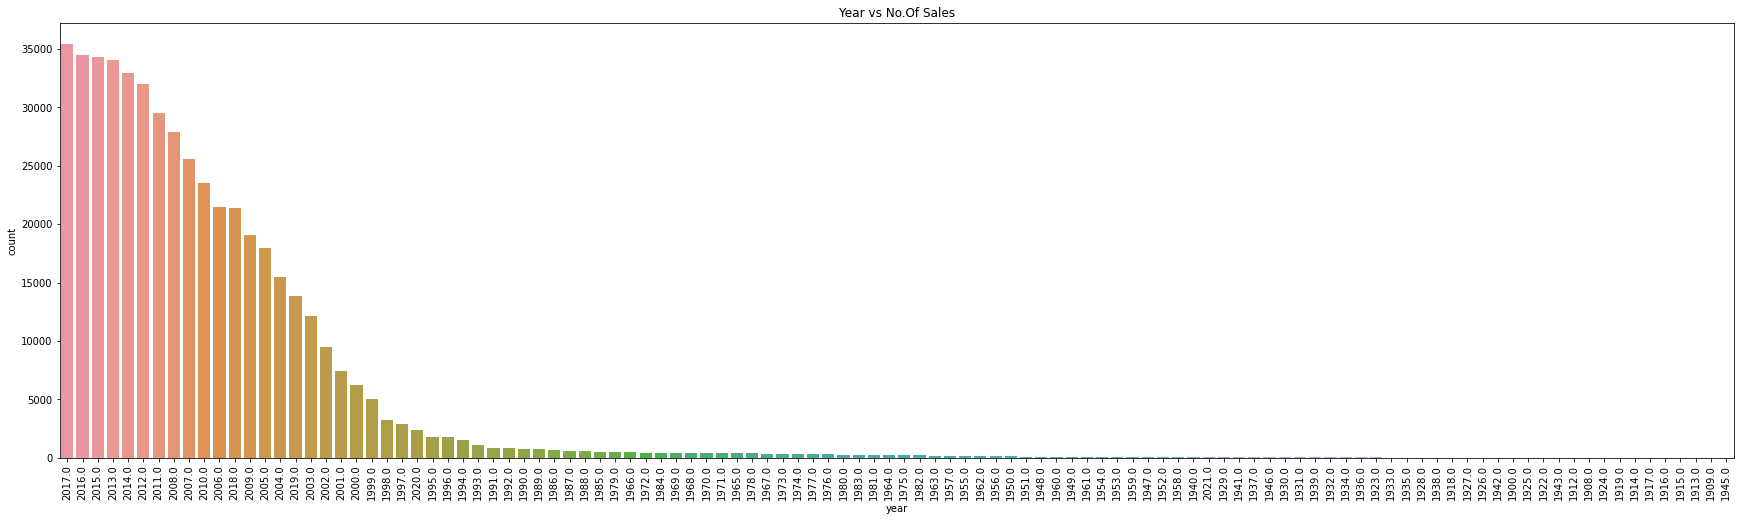

In [0]:
%%time
plt.figure(figsize=(30,8))
ax = sns.countplot(x='year',data=data,order=data['year'].value_counts().index);
plt.xticks(rotation='vertical')
plt.title('Year vs No.Of Sales')

We can see that the sales decreses as we move towards the past, it decreases after 1960 hence we will only keep data above 1960

In [0]:
## dropping data below 1960
%%time
data.drop(data[(data.year < 1960)].index,inplace=True)

CPU times: user 172 ms, sys: 732 µs, total: 173 ms
Wall time: 172 ms


In [0]:
%%time
data.shape

CPU times: user 17 µs, sys: 4 µs, total: 21 µs
Wall time: 24.6 µs


(488564, 25)

# Data Cleaning : 

In [0]:
%%time
data.columns

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 15.7 µs


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [0]:
%%time
data.head(2)

CPU times: user 755 µs, sys: 0 ns, total: 755 µs
Wall time: 739 µs


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,19UUA8F22CA003926,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794


### Dropping Columns

In [0]:
%%time
drop_columns = ['id','url','region_url','vin','image_url','region','title_status', 'size','lat','long','description','county']
data.drop(columns=drop_columns,inplace=True)

CPU times: user 42 ms, sys: 0 ns, total: 42 ms
Wall time: 41.6 ms


In [0]:
%%time
data.head(2)

CPU times: user 598 µs, sys: 0 ns, total: 598 µs
Wall time: 597 µs


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
0,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,automatic,NaN,other,blue,nc
2,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,automatic,NaN,NaN,blue,nc


#### Checking the total null values we had in the whole data set

In [0]:
%%time
data.isnull().sum()

CPU times: user 211 ms, sys: 812 µs, total: 212 ms
Wall time: 212 ms


price                0
year               929
manufacturer     20263
model             6670
condition       204003
cylinders       194400
fuel              3085
odometer         86024
transmission      3373
drive           140798
type            134025
paint_color     155451
state                0
dtype: int64

#### Dropping the Null values and checking the total rows we dropped

In [0]:
%%time
rows_existing = data.shape[0]
data.dropna(inplace=True)
rows_new = data.shape[0]

print('Total Number of rows Dropped for Null : ',(rows_existing-rows_new))

Total Number of rows Dropped for Null :  350170
CPU times: user 239 ms, sys: 1.54 ms, total: 241 ms
Wall time: 241 ms


In [0]:
%%time
print('Total No. of rows Dropped till now : ',(total_rows - rows_new))

Total No. of rows Dropped till now :  401365
CPU times: user 113 µs, sys: 25 µs, total: 138 µs
Wall time: 104 µs


In [0]:
%%time
data.shape

CPU times: user 14 µs, sys: 4 µs, total: 18 µs
Wall time: 21.9 µs


(138394, 13)

In [0]:
%%time
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138394 entries, 13 to 539752
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         138394 non-null  int64  
 1   year          138394 non-null  float64
 2   manufacturer  138394 non-null  object 
 3   model         138394 non-null  object 
 4   condition     138394 non-null  object 
 5   cylinders     138394 non-null  object 
 6   fuel          138394 non-null  object 
 7   odometer      138394 non-null  float64
 8   transmission  138394 non-null  object 
 9   drive         138394 non-null  object 
 10  type          138394 non-null  object 
 11  paint_color   138394 non-null  object 
 12  state         138394 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.8+ MB
CPU times: user 70.5 ms, sys: 42 µs, total: 70.5 ms
Wall time: 70.9 ms


## Splitting the data into Train and Test

In [0]:
%%time
X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CPU times: user 53 ms, sys: 0 ns, total: 53 ms
Wall time: 52.5 ms


In [0]:
%%time
print(X_train.shape)
print(X_test.shape)

(110715, 12)
(27679, 12)
CPU times: user 121 µs, sys: 27 µs, total: 148 µs
Wall time: 108 µs


In [0]:
%%time
X_train.columns

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 10 µs


Index(['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [0]:
%%time
train_year = X_train.year
train_manufacturer = X_train.manufacturer
train_model = X_train.model
train_condition = X_train.condition
train_cylinders = X_train.cylinders
train_fuel = X_train.fuel
train_odometer = X_train.odometer
train_transmission = X_train.transmission
train_drive = X_train.drive
train_type = X_train.type
train_paint_color = X_train.paint_color
train_state = X_train.state

CPU times: user 623 µs, sys: 0 ns, total: 623 µs
Wall time: 630 µs


In [0]:
%%time
test_year = X_test.year
test_manufacturer = X_test.manufacturer
test_model = X_test.model
test_condition = X_test.condition
test_cylinders = X_test.cylinders
test_fuel = X_test.fuel
test_odometer = X_test.odometer
test_transmission = X_test.transmission
test_drive = X_test.drive
test_type = X_test.type
test_paint_color = X_test.paint_color
test_state = X_test.state

CPU times: user 611 µs, sys: 0 ns, total: 611 µs
Wall time: 618 µs


## Data Pre-Processing :

### Manufacturer : 

In [0]:
%%time
train_manufacturer.unique()

CPU times: user 6.46 ms, sys: 1.66 ms, total: 8.12 ms
Wall time: 7.66 ms


array(['ford', 'honda', 'chevrolet', 'ram', 'acura', 'chrysler',
       'mercedes-benz', 'cadillac', 'volkswagen', 'lexus', 'toyota',
       'audi', 'mini', 'jeep', 'saturn', 'nissan', 'buick', 'pontiac',
       'subaru', 'dodge', 'kia', 'mazda', 'bmw', 'gmc', 'mercury',
       'rover', 'infiniti', 'hyundai', 'lincoln', 'volvo', 'fiat',
       'jaguar', 'mitsubishi', 'datsun', 'aston-martin', 'tesla',
       'harley-davidson', 'porche', 'alfa-romeo', 'ferrari', 'hennessey',
       'land rover', 'morgan'], dtype=object)

#### One-Hot Encoding : 

In [0]:
%%time
# save one hot encoder into pickle
manufacturer_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_manu_oneHot_train = manufacturer_onehot_encoder.fit_transform(train_manufacturer.values.reshape(-1,1))
x_manu_oneHot_test = manufacturer_onehot_encoder.transform(test_manufacturer.values.reshape(-1,1))

CPU times: user 38.4 ms, sys: 853 µs, total: 39.3 ms
Wall time: 38.9 ms


In [0]:
%%time
manufacturer_onehot_encoder.categories_

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs


[array(['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick',
        'cadillac', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'ferrari',
        'fiat', 'ford', 'gmc', 'harley-davidson', 'hennessey', 'honda',
        'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'land rover',
        'lexus', 'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini',
        'mitsubishi', 'morgan', 'nissan', 'pontiac', 'porche', 'ram',
        'rover', 'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen',
        'volvo'], dtype=object)]

In [0]:
%%time
print(x_manu_oneHot_train.shape)
print(x_manu_oneHot_test.shape)

(110715, 43)
(27679, 43)
CPU times: user 354 µs, sys: 79 µs, total: 433 µs
Wall time: 307 µs


### Model :

In [0]:
%%time
len(train_model.unique())

CPU times: user 19.4 ms, sys: 0 ns, total: 19.4 ms
Wall time: 18.8 ms


11680

In [0]:
%%time
train_model.value_counts()

CPU times: user 29.8 ms, sys: 133 µs, total: 29.9 ms
Wall time: 29.2 ms


f-150                    2203
silverado 1500           1748
1500                     1440
silverado                1012
2500                      889
                         ... 
z-28 camaro                 1
3 series 330ci 2dr cv       1
savanna high top van        1
300c hemi limited awd       1
yukon xl callaway           1
Name: model, Length: 11680, dtype: int64

#### Frequency Encoding :

In [0]:
%%time
dict_model_freq = dict(Counter(train_model)) # save  dictionary using pickle
x_model_freq_train = train_model.replace(dict_model_freq).values.reshape(-1,1)

CPU times: user 50.4 s, sys: 1.45 s, total: 51.8 s
Wall time: 51.9 s


In [0]:
%%time
#we use map to replace values not present in dictionary with Nan
x_model_freq_test = test_model.map(dict_model_freq).fillna(0).astype('int64').values.reshape(-1,1)

CPU times: user 18.3 ms, sys: 22 µs, total: 18.3 ms
Wall time: 17.6 ms


In [0]:
%%time
print(x_model_freq_train.shape)
print(x_model_freq_test.shape)

(110715, 1)
(27679, 1)
CPU times: user 131 µs, sys: 12 µs, total: 143 µs
Wall time: 105 µs


### Condition : 

In [0]:
%%time
train_condition.unique()

CPU times: user 6.55 ms, sys: 54 µs, total: 6.6 ms
Wall time: 6.27 ms


array(['like new', 'excellent', 'good', 'new', 'fair', 'salvage'],
      dtype=object)

#### One-Hot Encoding :

In [0]:
%%time
condition_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_condition_oneHot_train = condition_onehot_encoder.fit_transform(train_condition.values.reshape(-1,1))
x_condition_oneHot_test = condition_onehot_encoder.transform(test_condition.values.reshape(-1,1))

CPU times: user 40.6 ms, sys: 48 µs, total: 40.6 ms
Wall time: 40.3 ms


In [0]:
%%time
print(x_condition_oneHot_train.shape)
print(x_condition_oneHot_test.shape)

(110715, 6)
(27679, 6)
CPU times: user 96 µs, sys: 9 µs, total: 105 µs
Wall time: 90.4 µs


### Cylinder Types :

In [0]:
%%time
train_cylinders.unique()

CPU times: user 5.69 ms, sys: 0 ns, total: 5.69 ms
Wall time: 5.2 ms


array(['4 cylinders', '6 cylinders', '8 cylinders', '10 cylinders',
       '5 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

#### Value Encoding : Manual

In [0]:
%%time
cylinders_dict = {
    '4 cylinders':4, 
    '6 cylinders':6, 
    '8 cylinders':8, 
    '10 cylinders':10,
    '5 cylinders':5, 
    '3 cylinders':3, 
    'other':0, 
    '12 cylinders':12
}

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [0]:
%%time
x_cylinders_freq_train = train_cylinders.replace(cylinders_dict).values.reshape(-1,1)
x_cylinders_freq_test = test_cylinders.replace(cylinders_dict).values.reshape(-1,1)

CPU times: user 67.2 ms, sys: 9 µs, total: 67.2 ms
Wall time: 66.4 ms


In [0]:
%%time
print(x_cylinders_freq_train.shape)
print(x_cylinders_freq_test.shape)

(110715, 1)
(27679, 1)
CPU times: user 144 µs, sys: 0 ns, total: 144 µs
Wall time: 102 µs


### Fuel Type :

In [0]:
%%time
train_fuel.unique()

CPU times: user 5.03 ms, sys: 1e+03 ns, total: 5.03 ms
Wall time: 4.63 ms


array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

#### One Hot Encoder : 

In [0]:
%%time
fuel_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_fuel_oneHot_train = fuel_onehot_encoder.fit_transform(train_fuel.values.reshape(-1,1))
x_fuel_oneHot_test = fuel_onehot_encoder.transform(test_fuel.values.reshape(-1,1))

CPU times: user 36 ms, sys: 904 µs, total: 36.9 ms
Wall time: 36.5 ms


In [0]:
%%time
print(x_fuel_oneHot_train.shape)
print(x_fuel_oneHot_test.shape)

(110715, 5)
(27679, 5)
CPU times: user 78 µs, sys: 8 µs, total: 86 µs
Wall time: 90.6 µs


### Transmission Type

In [0]:
%%time
train_transmission.unique()

CPU times: user 7.13 ms, sys: 0 ns, total: 7.13 ms
Wall time: 6.76 ms


array(['automatic', 'other', 'manual'], dtype=object)

#### One-Hot Encoding :

In [0]:
%%time
transmission_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_transmission_oneHot_train = transmission_onehot_encoder.fit_transform(train_transmission.values.reshape(-1,1))
x_transmission_oneHot_test = transmission_onehot_encoder.transform(test_transmission.values.reshape(-1,1))

CPU times: user 36 ms, sys: 916 µs, total: 37 ms
Wall time: 36.4 ms


In [0]:
%%time
print(x_transmission_oneHot_train.shape)
print(x_transmission_oneHot_test.shape)

(110715, 3)
(27679, 3)
CPU times: user 80 µs, sys: 8 µs, total: 88 µs
Wall time: 81.1 µs


### Drive Type :

In [0]:
%%time
train_drive.unique()

CPU times: user 5.38 ms, sys: 1.04 ms, total: 6.42 ms
Wall time: 5.98 ms


array(['4wd', 'fwd', 'rwd'], dtype=object)

#### One-Hot Encoder :

In [0]:
%%time
drive_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_drive_oneHot_train = drive_onehot_encoder.fit_transform(train_drive.values.reshape(-1,1))
x_drive_oneHot_test = drive_onehot_encoder.transform(test_drive.values.reshape(-1,1))
print(x_drive_oneHot_train.shape)
print(x_drive_oneHot_test.shape)

(110715, 3)
(27679, 3)
CPU times: user 36.5 ms, sys: 947 µs, total: 37.5 ms
Wall time: 37.1 ms


### Car Type :

In [0]:
%%time
train_type.unique()

CPU times: user 7.32 ms, sys: 1.03 ms, total: 8.35 ms
Wall time: 8.08 ms


array(['SUV', 'coupe', 'truck', 'pickup', 'sedan', 'hatchback',
       'mini-van', 'van', 'other', 'wagon', 'convertible', 'offroad',
       'bus'], dtype=object)

#### One-Hot Encoder :

In [0]:
%%time
type_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_type_oneHot_train = type_onehot_encoder.fit_transform(train_type.values.reshape(-1,1))
x_type_oneHot_test = type_onehot_encoder.transform(test_type.values.reshape(-1,1))
print(x_type_oneHot_train.shape)
print(x_type_oneHot_test.shape)

(110715, 13)
(27679, 13)
CPU times: user 38.7 ms, sys: 53 µs, total: 38.7 ms
Wall time: 38.3 ms


### Paint :

In [0]:
%%time
train_paint_color.unique()

CPU times: user 7.11 ms, sys: 19 µs, total: 7.13 ms
Wall time: 6.76 ms


array(['blue', 'silver', 'red', 'black', 'white', 'grey', 'green',
       'brown', 'orange', 'purple', 'custom', 'yellow'], dtype=object)

#### Ordinal Encoder :

In [0]:
%%time
paint_color_ordinal_encoder = OrdinalEncoder()
x_paint_color_ordinal_train = paint_color_ordinal_encoder.fit_transform(train_paint_color.values.reshape(-1,1))
x_paint_color_ordinal_test = paint_color_ordinal_encoder.transform(test_paint_color.values.reshape(-1,1))
print(x_paint_color_ordinal_train.shape)
print(x_paint_color_ordinal_test.shape)

(110715, 1)
(27679, 1)
CPU times: user 36.6 ms, sys: 42 µs, total: 36.6 ms
Wall time: 36.1 ms


### State : 

In [0]:
%%time
train_state.unique()

CPU times: user 5.16 ms, sys: 14 µs, total: 5.18 ms
Wall time: 4.78 ms


array(['pa', 'de', 'fl', 'nc', 'al', 'wi', 'ma', 'tx', 'oh', 'id', 'tn',
       'mi', 'me', 'dc', 'ky', 'mt', 'ms', 'ca', 'ri', 'wa', 'in', 'ny',
       'az', 'md', 'or', 'il', 'la', 'ak', 'ar', 'mn', 'co', 'nv', 'mo',
       'sd', 'sc', 'ia', 'ct', 'ne', 'nh', 'vt', 'ok', 'nj', 'va', 'ks',
       'nd', 'ga', 'nm', 'wy', 'wv', 'hi', 'ut'], dtype=object)

#### Ordinal Encoder : 

In [0]:
%%time
state_ordinal_encoder = OrdinalEncoder()
x_state_ordinal_train = state_ordinal_encoder.fit_transform(train_state.values.reshape(-1,1))
x_state_ordinal_test = state_ordinal_encoder.transform(test_state.values.reshape(-1,1))
print(x_state_ordinal_train.shape)
print(x_state_ordinal_test.shape)

(110715, 1)
(27679, 1)
CPU times: user 34.3 ms, sys: 20 µs, total: 34.3 ms
Wall time: 33.9 ms


In [0]:
%%time
y.dtype

CPU times: user 47 µs, sys: 5 µs, total: 52 µs
Wall time: 74.4 µs


dtype('int64')

In [0]:
%%time
print(train_year.values.reshape(-1,1).shape)
print(x_manu_oneHot_train.shape)
print(x_model_freq_train.shape)
print(x_condition_oneHot_train.shape)
print(x_cylinders_freq_train.shape)
print(x_fuel_oneHot_train.shape)
print(train_odometer.values.reshape(-1,1).shape)
print(x_transmission_oneHot_train.shape)
print(x_drive_oneHot_train.shape)
print(x_type_oneHot_train.shape)
print(x_paint_color_ordinal_train.shape)
print(x_state_ordinal_train.shape)

(110715, 1)
(110715, 43)
(110715, 1)
(110715, 6)
(110715, 1)
(110715, 5)
(110715, 1)
(110715, 3)
(110715, 3)
(110715, 13)
(110715, 1)
(110715, 1)
CPU times: user 712 µs, sys: 0 ns, total: 712 µs
Wall time: 496 µs


## Standardizing the Data

In [0]:
%%time
# save year standard scalar
scalar = StandardScaler()
train_year_scaled = scalar.fit_transform(train_year.values.reshape(-1,1))
test_year_scaled = scalar.transform(test_year.values.reshape(-1,1))

CPU times: user 4.04 ms, sys: 15 µs, total: 4.05 ms
Wall time: 3.95 ms


In [0]:
%%time
# # save odometer standard scalar
scalar = StandardScaler()
train_odometer_scaled = scalar.fit_transform(train_odometer.values.reshape(-1,1))
test_odometer_scaled = scalar.transform(test_odometer.values.reshape(-1,1))

CPU times: user 3.39 ms, sys: 0 ns, total: 3.39 ms
Wall time: 2.99 ms


### Combining All the Encoded Features :

In [0]:
%%time
X_stack_train = hstack((train_year_scaled, x_manu_oneHot_train, x_model_freq_train, x_condition_oneHot_train, x_cylinders_freq_train, 
                      x_fuel_oneHot_train, train_odometer_scaled, x_transmission_oneHot_train, x_drive_oneHot_train, x_type_oneHot_train, 
                      x_paint_color_ordinal_train, x_state_ordinal_train))

CPU times: user 47.9 ms, sys: 982 µs, total: 48.9 ms
Wall time: 48.4 ms


In [0]:
%%time
X_stack_test = hstack((test_year_scaled, x_manu_oneHot_test, x_model_freq_test, x_condition_oneHot_test, x_cylinders_freq_test, 
                      x_fuel_oneHot_test, test_odometer_scaled, x_transmission_oneHot_test, x_drive_oneHot_test, x_type_oneHot_test, 
                      x_paint_color_ordinal_test, x_state_ordinal_test))

CPU times: user 13.9 ms, sys: 0 ns, total: 13.9 ms
Wall time: 13.6 ms


### Function to calculate R2 value, Relative Error & RMSE

In [0]:
%%time
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

def acc_boosting(y_true,y_pred,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    acc_test_r2_num = round(r2_score(y_true, y_pred) * 100, 2)
    print('acc(r2_score) =', acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(y_true, y_pred) * 100, 2)
    print('acc(relative error) =', acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(y_true, y_pred) * 100, 2)
    print('acc(rmse) =', acc_test_rmse_num)

def acc_model(y_true,y_pred):
    # Calculation of accuracy of model акщь Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
 
    acc_test_r2_num = round(r2_score(y_true, y_pred) * 100, 2)
    print('acc(r2_score) =', acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(y_true, y_pred) * 100, 2)
    print('acc(relative error) =', acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(y_true, y_pred) * 100, 2)
    print('acc(rmse) =', acc_test_rmse_num)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


# Modeling :

## 1. Linear Regression : 

In [0]:
%%time
model = LinearRegression(n_jobs=-1,normalize=True)
model.fit(X_stack_train, y_train)

CPU times: user 249 ms, sys: 368 ms, total: 617 ms
Wall time: 200 ms


In [0]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 3650 12500 14400 12500 16995]
First Five Predicted Value of Train :  [10912 12937 18855   481 17336]



First Five Actual Value of Test :  [16500 10995 21700  7995  4450]
First Five Predicted Value of Test :  [20491 14059 22029 13069  7771]
CPU times: user 8.72 ms, sys: 924 µs, total: 9.64 ms
Wall time: 8.38 ms


In [0]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 51.28
acc(relative error) = 35.75
acc(rmse) = 699165.39
For Test Data
acc(r2_score) = 51.39
acc(relative error) = 36.11
acc(rmse) = 693342.91
CPU times: user 25.7 ms, sys: 66 µs, total: 25.8 ms
Wall time: 23.9 ms


## 2. Support Vector Regressor : 

In [0]:
%%time
model = SVR()
model.fit(X_stack_train, y_train)

CPU times: user 52min 55s, sys: 4.38 s, total: 53min
Wall time: 53min 5s


In [0]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 3650 12500 14400 12500 16995]
First Five Predicted Value of Train :  [9237 9042 9160 9148 9212]



First Five Actual Value of Test :  [16500 10995 21700  7995  4450]
First Five Predicted Value of Test :  [9128 9201 9190 9199 9209]
CPU times: user 19min 15s, sys: 115 ms, total: 19min 15s
Wall time: 19min 17s


In [0]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = -8.85
acc(relative error) = 57.31
acc(rmse) = 1045067.31
For Test Data
acc(r2_score) = -8.46
acc(relative error) = 57.38
acc(rmse) = 1035685.06
CPU times: user 28.7 ms, sys: 2 ms, total: 30.7 ms
Wall time: 28.5 ms


## 3. Linear Support Vector Regressor : 

In [0]:
%%time
model = LinearSVR()
model.fit(X_stack_train, y_train)

CPU times: user 24.7 s, sys: 2 ms, total: 24.7 s
Wall time: 24.7 s


In [0]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 3650 12500 14400 12500 16995]
First Five Predicted Value of Train :  [ 6754 12764 16660  1318 16925]



First Five Actual Value of Test :  [16500 10995 21700  7995  4450]
First Five Predicted Value of Test :  [20167 14814 19401 11468  5588]
CPU times: user 7.99 ms, sys: 1e+03 µs, total: 8.99 ms
Wall time: 7.63 ms


In [0]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 35.54
acc(relative error) = 33.91
acc(rmse) = 804175.36
For Test Data
acc(r2_score) = 34.76
acc(relative error) = 34.08
acc(rmse) = 803239.29
CPU times: user 22.7 ms, sys: 2 µs, total: 22.7 ms
Wall time: 21 ms


## 4. MLP Regressor : 

In [0]:
%%time
model = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,10,2)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['adaptive'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [500],
              'early_stopping': [True],
              'warm_start': [False]}
grid = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
grid.fit(X_stack_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 22.0min finished


CPU times: user 5min, sys: 2min 19s, total: 7min 20s
Wall time: 26min 35s


In [0]:
%%time
model = MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5)
model.fit(X_stack_train, y_train)

CPU times: user 9min 31s, sys: 16min 6s, total: 25min 38s
Wall time: 6min 27s


In [0]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 3650 12500 14400 12500 16995]
First Five Predicted Value of Train :  [ 5451 13555 15752 11329 18500]



First Five Actual Value of Test :  [16500 10995 21700  7995  4450]
First Five Predicted Value of Test :  [18822 14617 23796  9774  4835]
CPU times: user 1.66 s, sys: 562 ms, total: 2.22 s
Wall time: 1.56 s


In [0]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 74.58
acc(relative error) = 22.65
acc(rmse) = 505042.37
For Test Data
acc(r2_score) = 74.4
acc(relative error) = 22.98
acc(rmse) = 503142.45
CPU times: user 64.4 ms, sys: 87.3 ms, total: 152 ms
Wall time: 40.7 ms


## 5. SGD Regressor :

In [0]:
%%time
model = SGDRegressor(learning_rate='adaptive')
model.fit(X_stack_train, y_train)

CPU times: user 1.72 s, sys: 151 ms, total: 1.87 s
Wall time: 1.7 s


In [0]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 3650 12500 14400 12500 16995]
First Five Predicted Value of Train :  [ 2731241881   196754901  7052637029 -1041018940  7142158145]



First Five Actual Value of Test :  [16500 10995 21700  7995  4450]
First Five Predicted Value of Test :  [ 20863121975  -4164361025 -20923311606 -38023891940   8352860102]
CPU times: user 27 ms, sys: 1.16 ms, total: 28.1 ms
Wall time: 27.2 ms


In [0]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = -541746662852.12
acc(relative error) = 68561689.97
acc(rmse) = 73725901010.56
For Test Data
acc(r2_score) = -544619576720.21
acc(relative error) = 69557750.71
acc(rmse) = 73390441004.45
CPU times: user 20.9 ms, sys: 2.19 ms, total: 23.1 ms
Wall time: 21.3 ms


## 6. Decision Tree Regressor : 

In [0]:
%%time
model = DecisionTreeRegressor(splitter='random', max_features='auto')
model.fit(X_stack_train, y_train)

CPU times: user 22.6 s, sys: 25 ms, total: 22.7 s
Wall time: 22.7 s


In [0]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 3650 12500 14400 12500 16995]
First Five Predicted Value of Train :  [ 3650 12500 14400 12500 16995]



First Five Actual Value of Test :  [16500 10995 21700  7995  4450]
First Five Predicted Value of Test :  [16900 14995 21700  7995  4895]
CPU times: user 99 ms, sys: 100 µs, total: 99.1 ms
Wall time: 98.7 ms


In [0]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 99.94
acc(relative error) = 0.16
acc(rmse) = 24394.21
For Test Data
acc(r2_score) = 67.14
acc(relative error) = 18.66
acc(rmse) = 570063.77
CPU times: user 34.1 ms, sys: 2.46 ms, total: 36.6 ms
Wall time: 36 ms


## 7. XGB Regressor : 

In [0]:
%%time
xgb_clf = xgb.XGBRegressor({'objective': 'reg:squarederror'}) 
parameters = {'n_estimators': [60, 100, 120, 150], 
              'learning_rate': [0.001, 0.01, 0.1],
              'max_depth': [5, 10],
              'reg_lambda': [0.5],
              'n_jobs':[-1]}
grid = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1)
grid.fit(X_stack_train, y_train)

[09:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1min 4s, sys: 781 ms, total: 1min 5s
Wall time: 13min 10s


In [0]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
%%time
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=-1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
model.fit(X_stack_train, y_train)

CPU times: user 33.2 s, sys: 62.4 ms, total: 33.3 s
Wall time: 33.3 s


In [0]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 3650 12500 14400 12500 16995]
First Five Predicted Value of Train :  [ 5330 14183 15042 11616 16897]



First Five Actual Value of Test :  [16500 10995 21700  7995  4450]
First Five Predicted Value of Test :  [15635 16376 21528  6743  4696]
CPU times: user 3.39 s, sys: 34.1 ms, total: 3.43 s
Wall time: 3.43 s


In [0]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 93.16
acc(relative error) = 13.2
acc(rmse) = 261974.97
For Test Data
acc(r2_score) = 85.22
acc(relative error) = 16.74
acc(rmse) = 382354.26
CPU times: user 26.3 ms, sys: 1.79 ms, total: 28 ms
Wall time: 26.1 ms


## 8. Light GBM : 

In [0]:
%%time
train_set = lgb.Dataset(X_stack_train, y_train, silent=False)
test_set = lgb.Dataset(X_stack_test, y_test, silent=False)
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,        
    }
model = lgb.train(params, train_set = train_set, num_boost_round=1000,
                   early_stopping_rounds=800,verbose_eval=500,  valid_sets=test_set, )

Training until validation scores don't improve for 800 rounds.
[500]	valid_0's rmse: 4705.51
[1000]	valid_0's rmse: 4467.18
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 4467.18
CPU times: user 15.7 s, sys: 90.2 ms, total: 15.7 s
Wall time: 15.8 s


In [0]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 3650 12500 14400 12500 16995]
First Five Predicted Value of Train :  [ 6443 13558 15139 11787 15623]



First Five Actual Value of Test :  [16500 10995 21700  7995  4450]
First Five Predicted Value of Test :  [18242 16614 22497  9939  5149]
CPU times: user 12.8 s, sys: 8.09 ms, total: 12.8 s
Wall time: 12.8 s


In [0]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 81.58
acc(relative error) = 19.49
acc(rmse) = 429924.13
For Test Data
acc(r2_score) = 79.82
acc(relative error) = 20.07
acc(rmse) = 446717.59
CPU times: user 25.7 ms, sys: 890 µs, total: 26.6 ms
Wall time: 25.1 ms


### Plotting the important features :

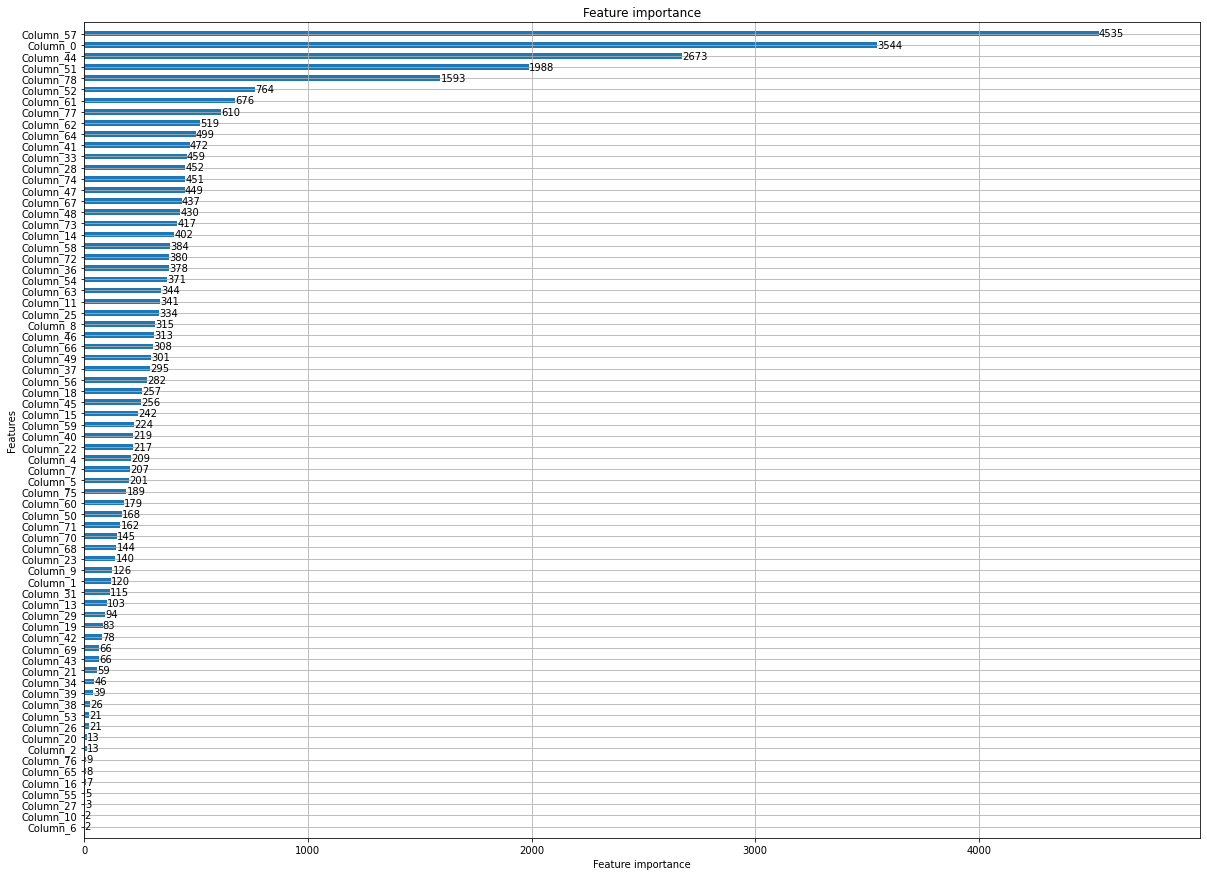

CPU times: user 1.07 s, sys: 64.1 ms, total: 1.13 s
Wall time: 1.13 s


In [0]:
%%time
fig =  plt.figure(figsize = (20,15))
axes = fig.add_subplot(111)
lgb.plot_importance(model,ax = axes,height = 0.5)
plt.show();
plt.close()

## Summarizing the Results of the Models :

In [0]:
x = PrettyTable()

x.field_names = ["Model Name", "Train R2 Score", "Train Relative Error", "Train RMSE", "Test R2 Score", "Test Relative Error", "Test RMSE"]

x.add_row(["Linear Regression", 51.28, 35.75, 699165.39, 51.39, 36.11, 693342.91])
x.add_row(["Support Vector Regressor", -8.85, 57.31, 1045067.31, -8.46, 57.38, 1035685.06])
x.add_row(["Linear Support Vector Regressor", 35.54, 33.91, 804175.36, 34.76, 34.08, 803239.29])
x.add_row(["MLP Regressor", 74.58, 22.65, 505042.37, 74.4, 22.98, 503142.45])
x.add_row(["SGD Regressor", -541746662852.12, 68561689.97, 73725901010.56, -544619576720.21, 69557750.71, 73390441004.45])
x.add_row(["MLP Regressor", 99.94, 0.16, 24394.21, 67.14, 18.66, 570063.77])
x.add_row(["XGB Regressor", 93.16, 13.2, 261974.97, 85.22, 16.74, 382354.26])
x.add_row(["LGBM Regressor", 81.58, 19.49, 429924.13, 79.82, 20.07, 446717.59])

print(x)

+---------------------------------+------------------+----------------------+----------------+------------------+---------------------+----------------+
|            Model Name           |  Train R2 Score  | Train Relative Error |   Train RMSE   |  Test R2 Score   | Test Relative Error |   Test RMSE    |
+---------------------------------+------------------+----------------------+----------------+------------------+---------------------+----------------+
|        Linear Regression        |      51.28       |        35.75         |   699165.39    |      51.39       |        36.11        |   693342.91    |
|     Support Vector Regressor    |      -8.85       |        57.31         |   1045067.31   |      -8.46       |        57.38        |   1035685.06   |
| Linear Support Vector Regressor |      35.54       |        33.91         |   804175.36    |      34.76       |        34.08        |   803239.29    |
|          MLP Regressor          |      74.58       |        22.65         |   50